In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "car.data"  # Replace with the correct file path
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(file_path, names=column_names)

# Display the first few rows to inspect
print(df.head())

# Define the ordinal encoding mappings for each column
ordinal_mappings = {
    'buying': {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3},
    'maint': {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3},
    'doors': {'2': 0, '3': 1, '4': 2, '5more': 3},
    'persons': {'2': 0, '4': 1, 'more': 2},
    'lug_boot': {'small': 0, 'med': 1, 'big': 2},
    'safety': {'low': 0, 'med': 1, 'high': 2},
    'class': {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}
}

# Apply the ordinal encoding mappings to the DataFrame
for column, mapping in ordinal_mappings.items():
    df[column] = df[column].map(mapping)

# Display the first few rows after encoding
print(df.head())

# Separate features (X) and target (y)
X = df.drop('class', axis=1)  # Features
y = df['class']  # Target

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the training and test sets
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")



# Define models and hyperparameter grids
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC()
}

# Train models and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {"Accuracy": accuracy, "Report": report}

# Display results
for model, result in results.items():
    print(f"{model} - Accuracy: {result['Accuracy']:.4f}")
    print(f"Classification Report: \n{result['Report']}")


  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         0       0      0
1       3      3      0        0         0       1      0
2       3      3      0        0         0       2      0
3       3      3      0        0         1       0      0
4       3      3      0        0         1       1      0
Training set shape: (1382, 6), Test set shape: (346, 6)
Decision Tree - Accuracy: 0.9769
Classification Report: 
{'0': {'precision': 0.9836734693877551, 'recall': 0.9958677685950413, 'f1-score': 0.9897330595482546, 'support': 242.0}, '1': {'precision': 0.96, 'recall': 0.935064935064935, 'f1-score': 0.9473684210526315, 'support': 77.

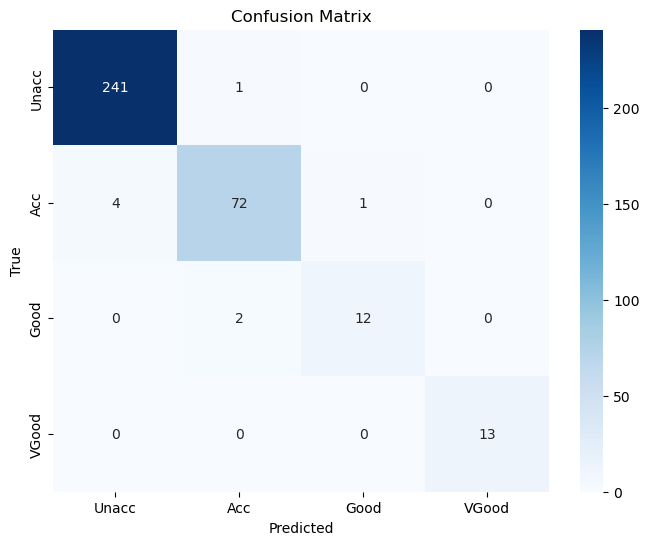

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

# Train the Decision Tree model on the full training data
best_model = DecisionTreeClassifier()
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unacc", "Acc", "Good", "VGood"], yticklabels=["Unacc", "Acc", "Good", "VGood"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()




